In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


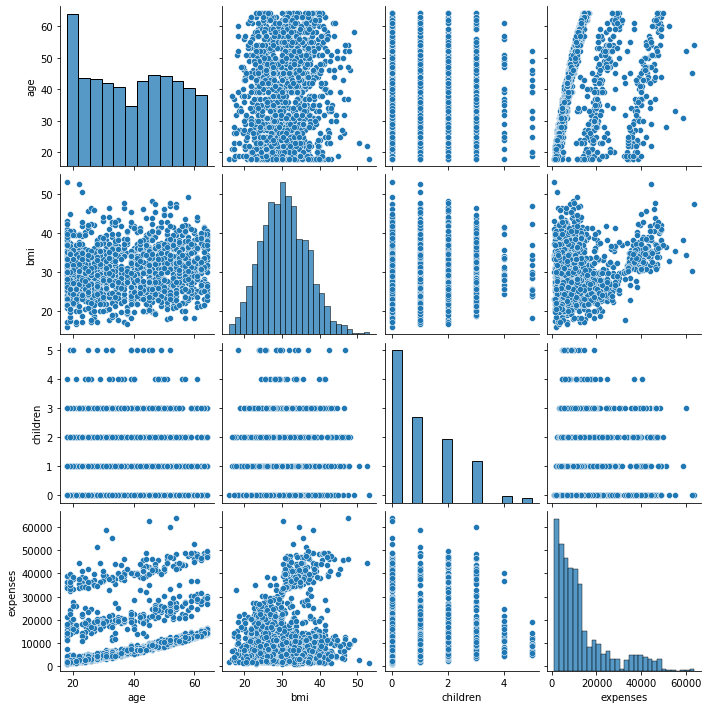

In [8]:
sn.pairplot(df)

c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

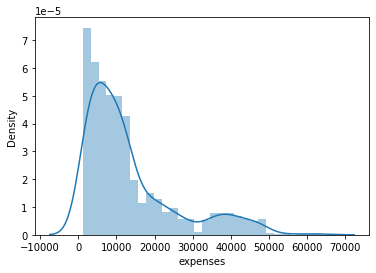

In [10]:
sn.distplot(df['expenses'])

<AxesSubplot:>

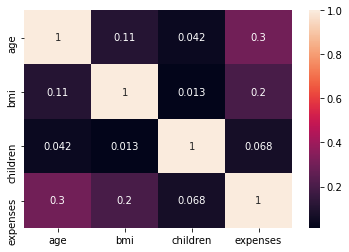

In [11]:
sn.heatmap(df.corr(), annot=True)

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
gender_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])

df = pd.concat([df,gender_dummy,smoker_dummy,
                    region_dummy], axis=1)

df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)

In [14]:
df = df.drop(['sex','smoker','region'], axis=1)

In [17]:
df.head(12)

,age,bmi,children,expenses,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
5,31,25.7,0,3756.62,1,0,1,0,0,0,1,0
6,46,33.4,1,8240.59,1,0,1,0,0,0,1,0
7,37,27.7,3,7281.51,1,0,1,0,0,1,0,0
8,37,29.8,2,6406.41,0,1,1,0,1,0,0,0
9,60,25.8,0,28923.14,1,0,1,0,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = df[['age', 'bmi', 'children',
    'female','male','non-smoker',
    'nicotian','northeast','northwest',
    'southeast','southwest',]]

y = df['expenses']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [26]:
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

print(coeff_df)

-546.9928845689792
             Coefficient
age           271.185522
bmi           324.875956
children      440.985063
female        202.820728
male         -202.820728
non-smoker -12178.276207
nicotian    12178.276207
northeast     578.542086
northwest     -91.381832
southeast    -217.112639
southwest    -270.047614


In [29]:
predictions = lm.predict(X_test)
print("Predicted medical costs values:", predictions)

Predicted medical costs values: [ 5844.53582947 11749.0767534   6285.04767773 12461.90899482
 11668.89361188 36445.01178715  6056.60367614 29532.9895034
  5481.93284916  4295.38827741 36299.27109493  6414.98271879
 13177.03064515  7727.01531505 33862.43058355  9673.62384091
  5712.92238982 29352.66066397 16273.48697608 15058.93150485
 18129.34011583 11791.34879202 32850.64744643 27273.22727305
  9274.55278658 25946.22934117 16261.45736434  4293.50581382
  2707.7816181  34755.73964112  -707.02427717 14325.69171958
 30330.74224331 13483.88558659  4951.98907637 10127.08039203
 11220.07750316  5189.19766716 15334.00075853 26690.39958762
 14064.61645405  1649.23959045 35191.88019715  9952.92327424
  8439.62028304 32456.26188986  5406.22994354  8303.67501251
 30558.62862758  9052.96140588 10280.12847437 12000.7409467
  4625.95962823 27800.30716775 14442.27467133 13318.34898299
  5234.44153137 15168.16387147  8549.20631653  4187.61428095
 15473.11002938 18139.56866918  3009.07505115 13385.529

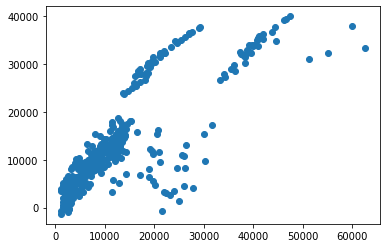

In [30]:
plt.scatter(y_test, predictions)

c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

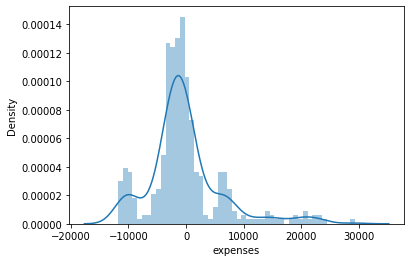

In [32]:
sn.distplot((y_test-predictions), bins=50)

In [33]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))

4328.109003882918
42141430.91524722
